## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(["EIN", "NAME"], axis=1)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Determine the number of unique values in each column.
application_df.nunique(axis=0)

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
application_df['APPLICATION_TYPE'].value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [5]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = ['T25','T14','T15','T29','T17','T2','T12','T13','T9']

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [6]:
# Look at CLASSIFICATION value counts for binning
class_counts = application_df['CLASSIFICATION'].value_counts()

In [7]:
# You may find it helpful to look at CLASSIFICATION value counts >1
application_df['CLASSIFICATION'].value_counts().loc[lambda x : x>1]
class_counts.index

Index(['C1000', 'C2000', 'C1200', 'C3000', 'C2100', 'C7000', 'C1700', 'C4000',
       'C5000', 'C1270', 'C2700', 'C2800', 'C7100', 'C1300', 'C1280', 'C1230',
       'C1400', 'C7200', 'C2300', 'C1240', 'C8000', 'C7120', 'C1500', 'C1800',
       'C6000', 'C1250', 'C8200', 'C1238', 'C1278', 'C1235', 'C1237', 'C7210',
       'C2400', 'C1720', 'C4100', 'C1257', 'C1600', 'C1260', 'C2710', 'C0',
       'C3200', 'C1234', 'C1246', 'C1267', 'C1256', 'C2190', 'C4200', 'C2600',
       'C5200', 'C1370', 'C1248', 'C6100', 'C1820', 'C1900', 'C1236', 'C3700',
       'C2570', 'C1580', 'C1245', 'C2500', 'C1570', 'C1283', 'C2380', 'C1732',
       'C1728', 'C2170', 'C4120', 'C8210', 'C2561', 'C4500', 'C2150'],
      dtype='object')

In [8]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = []
for c in class_counts.index:
  if class_counts[c] < 1883:
    classifications_to_replace.append(c)
classifications_to_replace



# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [9]:
# Convert categorical data to numeric with `pd.get_dummies`
dummy = pd.get_dummies(application_df)
dummy.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [10]:
# Split our preprocessed data into our features and target arrays
X = dummy.drop(['IS_SUCCESSFUL'],axis=1)
y = dummy['IS_SUCCESSFUL']
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [11]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [12]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
num_features = len(X_train_scaled[0])
hidden_node1 = 200
hidden_node2 = 150
hidden_node3 = 50


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_node1, input_dim=num_features, activation='relu'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_node2, activation='relu'))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_node3, activation='relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 200)               8800      
                                                                 
 dense_1 (Dense)             (None, 150)               30150     
                                                                 
 dense_2 (Dense)             (None, 50)                7550      
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 46,551
Trainable params: 46,551
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Compile the model
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=900)

Epoch 1/900
804/804 [==============================] - 2s 2ms/step - loss: 0.5686 - accuracy: 0.7202
Epoch 2/900
804/804 [==============================] - 2s 2ms/step - loss: 0.5556 - accuracy: 0.7269
Epoch 3/900
804/804 [==============================] - 2s 2ms/step - loss: 0.5515 - accuracy: 0.7309
Epoch 4/900
804/804 [==============================] - 2s 2ms/step - loss: 0.5511 - accuracy: 0.7313
Epoch 5/900
804/804 [==============================] - 2s 2ms/step - loss: 0.5496 - accuracy: 0.7325
Epoch 6/900
804/804 [==============================] - 2s 2ms/step - loss: 0.5482 - accuracy: 0.7325
Epoch 7/900
804/804 [==============================] - 2s 2ms/step - loss: 0.5474 - accuracy: 0.7328
Epoch 8/900
804/804 [==============================] - 2s 2ms/step - loss: 0.5466 - accuracy: 0.7331
Epoch 9/900
804/804 [==============================] - 2s 2ms/step - loss: 0.5453 - accuracy: 0.7337
Epoch 10/900
804/804 [==============================] - 2s 2ms/step - loss: 0.5449 - accura

804/804 [==============================] - 2s 2ms/step - loss: 0.5302 - accuracy: 0.7419
Epoch 161/900
804/804 [==============================] - 2s 2ms/step - loss: 0.5298 - accuracy: 0.7421
Epoch 162/900
804/804 [==============================] - 2s 2ms/step - loss: 0.5316 - accuracy: 0.7416
Epoch 163/900
804/804 [==============================] - 2s 2ms/step - loss: 0.5309 - accuracy: 0.7421
Epoch 164/900
804/804 [==============================] - 2s 2ms/step - loss: 0.5298 - accuracy: 0.7422
Epoch 165/900
804/804 [==============================] - 2s 2ms/step - loss: 0.5303 - accuracy: 0.7416
Epoch 166/900
804/804 [==============================] - 2s 2ms/step - loss: 0.5308 - accuracy: 0.7421
Epoch 167/900
804/804 [==============================] - 2s 2ms/step - loss: 0.5300 - accuracy: 0.7416
Epoch 168/900
804/804 [==============================] - 2s 2ms/step - loss: 0.5317 - accuracy: 0.7413
Epoch 169/900
804/804 [==============================] - 2s 2ms/step - loss: 0.5306 - a

804/804 [==============================] - 2s 2ms/step - loss: 0.5297 - accuracy: 0.7417
Epoch 319/900
804/804 [==============================] - 2s 2ms/step - loss: 0.5303 - accuracy: 0.7425
Epoch 320/900
804/804 [==============================] - 2s 2ms/step - loss: 0.5285 - accuracy: 0.7429
Epoch 321/900
804/804 [==============================] - 2s 2ms/step - loss: 0.5286 - accuracy: 0.7434
Epoch 322/900
804/804 [==============================] - 2s 2ms/step - loss: 0.5280 - accuracy: 0.7428
Epoch 323/900
804/804 [==============================] - 2s 2ms/step - loss: 0.5283 - accuracy: 0.7425
Epoch 324/900
804/804 [==============================] - 2s 2ms/step - loss: 0.5282 - accuracy: 0.7421
Epoch 325/900
804/804 [==============================] - 2s 2ms/step - loss: 0.5290 - accuracy: 0.7430
Epoch 326/900
804/804 [==============================] - 2s 2ms/step - loss: 0.5292 - accuracy: 0.7426
Epoch 327/900
804/804 [==============================] - 2s 2ms/step - loss: 0.5301 - a

804/804 [==============================] - 2s 2ms/step - loss: 0.5279 - accuracy: 0.7426
Epoch 477/900
804/804 [==============================] - 2s 2ms/step - loss: 0.5275 - accuracy: 0.7432
Epoch 478/900
804/804 [==============================] - 2s 2ms/step - loss: 0.5283 - accuracy: 0.7430
Epoch 479/900
804/804 [==============================] - 2s 2ms/step - loss: 0.5278 - accuracy: 0.7426
Epoch 480/900
804/804 [==============================] - 2s 2ms/step - loss: 0.5282 - accuracy: 0.7424
Epoch 481/900
804/804 [==============================] - 2s 2ms/step - loss: 0.5276 - accuracy: 0.7428
Epoch 482/900
804/804 [==============================] - 2s 2ms/step - loss: 0.5291 - accuracy: 0.7427
Epoch 483/900
804/804 [==============================] - 2s 2ms/step - loss: 0.5279 - accuracy: 0.7434
Epoch 484/900
804/804 [==============================] - 2s 2ms/step - loss: 0.5280 - accuracy: 0.7428
Epoch 485/900
804/804 [==============================] - 2s 2ms/step - loss: 0.5277 - a

804/804 [==============================] - 2s 2ms/step - loss: 0.5278 - accuracy: 0.7432
Epoch 635/900
804/804 [==============================] - 2s 2ms/step - loss: 0.5343 - accuracy: 0.7434
Epoch 636/900
804/804 [==============================] - 2s 2ms/step - loss: 0.5296 - accuracy: 0.7427
Epoch 637/900
804/804 [==============================] - 2s 2ms/step - loss: 0.5274 - accuracy: 0.7437
Epoch 638/900
804/804 [==============================] - 1s 2ms/step - loss: 0.5282 - accuracy: 0.7433
Epoch 639/900
804/804 [==============================] - 2s 2ms/step - loss: 0.5296 - accuracy: 0.7400
Epoch 640/900
804/804 [==============================] - 2s 2ms/step - loss: 0.5273 - accuracy: 0.7434
Epoch 641/900
804/804 [==============================] - 2s 2ms/step - loss: 0.5267 - accuracy: 0.7433
Epoch 642/900
804/804 [==============================] - 2s 2ms/step - loss: 0.5274 - accuracy: 0.7428
Epoch 643/900
804/804 [==============================] - 2s 2ms/step - loss: 0.5286 - a

804/804 [==============================] - 2s 2ms/step - loss: 0.5282 - accuracy: 0.7432
Epoch 793/900
804/804 [==============================] - 2s 2ms/step - loss: 0.5261 - accuracy: 0.7432
Epoch 794/900
804/804 [==============================] - 2s 2ms/step - loss: 0.5268 - accuracy: 0.7431
Epoch 795/900
804/804 [==============================] - 2s 2ms/step - loss: 0.5293 - accuracy: 0.7430
Epoch 796/900
804/804 [==============================] - 2s 2ms/step - loss: 0.5272 - accuracy: 0.7434
Epoch 797/900
804/804 [==============================] - 2s 2ms/step - loss: 0.5294 - accuracy: 0.7436
Epoch 798/900
804/804 [==============================] - 2s 2ms/step - loss: 0.5257 - accuracy: 0.7441
Epoch 799/900
804/804 [==============================] - 2s 2ms/step - loss: 0.5263 - accuracy: 0.7431
Epoch 800/900
804/804 [==============================] - 2s 2ms/step - loss: 0.5262 - accuracy: 0.7433
Epoch 801/900
804/804 [==============================] - 2s 2ms/step - loss: 0.5291 - a

In [15]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.7578 - accuracy: 0.7268 - 505ms/epoch - 2ms/step
Loss: 0.7577964067459106, Accuracy: 0.7267638444900513


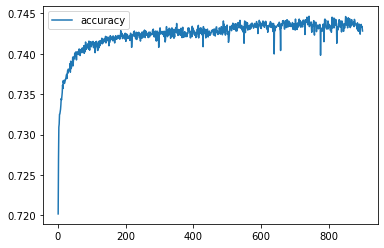

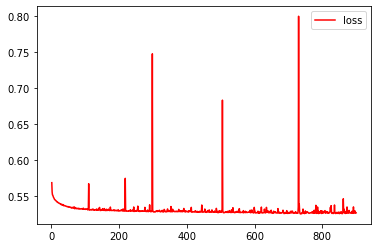

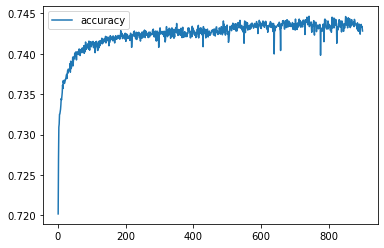

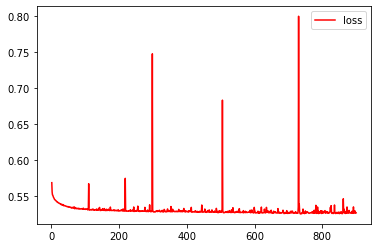

In [17]:
# Export our model to HDF5 file
history_df = pd.DataFrame(fit_model.history)
history_df.to_hdf('history/AlphabetSoupCharity_Optimization3.h5','df',mode='w',format='table')

# Plot the accuracy and loss of the model
history_df.index += 1
history_df.plot(y="accuracy")
history_df.plot(y="loss", color='red')
fig_acc = history_df.plot(y="accuracy")
fig_loss = history_df.plot(y="loss", color='red')
fig_acc.figure.savefig("images/acc_plot3.PNG")
fig_loss.figure.savefig("images/loss_plot3.PNG")